# Country emissions dataset cleaning

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools


# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Helper functions

In [2]:
def create_CO2eq_columns(df):
    # Define the conversion factors
    conversion_factors = {
        'N2O': 265,
        'CH4': 28
    }
    
    # Loop through the columns in the dataframe
    for column in df.columns:
        if 'N2O' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('N2O', 'N2O_CO2eq')
            # Multiply by the N2O conversion factor
            df[new_column] = df[column] * conversion_factors['N2O']
            df.drop(column, axis=1, inplace=True)
        
        elif 'CH4' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('CH4', 'CH4_CO2eq')
            # Multiply by the CH4 conversion factor
            df[new_column] = df[column] * conversion_factors['CH4']
            df.drop(column, axis=1, inplace=True)
    
    return df

def query_country(df, Area=None, target_col=None):
    if Area:
        query_df = df[df['Area'] == Area]
    else:
        Area = random.choice(df['Area'].unique())
        query_df = df[df['Area'] == Area]

    if query_df.empty:
        print(f"No data found for Area: {Area}")
        return pd.DataFrame()  # Return an empty DataFrame explicitly
    elif target_col:
        if target_col in query_df.columns:
            sns.lineplot(data=query_df, x='Year', y=target_col)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Column '{target_col}' does not exist in the DataFrame.")
            return query_df

    return query_df

## Data loading

In [3]:
df = pd.read_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\full_country_dataset_v1.parquet')
df.head()

,Area Code,Area,Year,Total_Energy_Emissions_(CH4)_kt,Total_Energy_Emissions_(CO2)_kt,Total_Energy_Emissions_(N2O)_kt,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Emissions_(CO2)_kt,Cropland_organic_soils_Emissions_(N2O)_kt,...,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_y,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD
0,1,Armenia,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2301.720664,647.179931
1,1,Armenia,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.233892,2101.656351,580.948237
2,1,Armenia,1992,0.0300,734.6265,0.0179,7017.1128,0.0,0.0,0.0,...,835.9032,NaN,4.2975,82.7595,606.975,2974.0,3574.555,-39.711192,1251.976343,350.246770
3,1,Armenia,1993,0.0077,90.3345,0.0093,1600.6884,0.0,0.0,0.0,...,500.8966,NaN,4.2975,82.7595,572.050,2974.0,3457.349,-3.484703,1168.728174,338.041712
4,1,Armenia,1994,0.0081,95.1042,0.0080,1670.0715,0.0,0.0,0.0,...,568.0747,NaN,4.2975,38.6370,567.245,2974.0,3373.713,10.243232,1257.275245,372.668109


In [4]:
df.Area.nunique()

288

## Transforming NO2 and CH4 emissions to CO2eq emissions

In [5]:
for col in df.columns:
    if 'N2O' in col or 'CH4' in col:
        print(col)

Total_Energy_Emissions_(CH4)_kt
Total_Energy_Emissions_(N2O)_kt
Cropland_organic_soils_Emissions_(N2O)_kt
Drained_organic_soils_Emissions_(N2O)_kt
Grassland_organic_soils_Emissions_(N2O)_kt


In [6]:
print(df.shape)
create_CO2eq_columns(df)
print(df.shape)

(39911, 78)
(39911, 78)


## EDA

In [7]:
df.columns

Index(['Area Code', 'Area', 'Year', 'Total_Energy_Emissions_(CO2)_kt',
       'Total_Energy_Energy_use_in_agriculture_TJ',
       'Cropland_organic_soils_Area_ha',
       'Cropland_organic_soils_Emissions_(CO2)_kt',
       'Cropland_organic_soils_Net_stock_change_(C)_kt',
       'Drained_organic_soils_Area_ha',
       'Drained_organic_soils_Emissions_(CO2)_kt',
       'Drained_organic_soils_Net_stock_change_(C)_kt',
       'Grassland_organic_soils_Area_ha',
       'Grassland_organic_soils_Emissions_(CO2)_kt',
       'Grassland_organic_soils_Net_stock_change_(C)_kt',
       'Forestland_Area_1000_ha',
       'Forestland_Net_emissions/removals_(CO2)_(Forest_land)_kt',
       'Net_Forest_conversion_Area_1000_ha',
       'Net_Forest_conversion_Net_emissions/removals_(CO2)_(Forest_land)_kt',
       'Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x',
       'Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt',
       'Energy_Use_(Pre-_and_Post-Production)_Energy_Use_

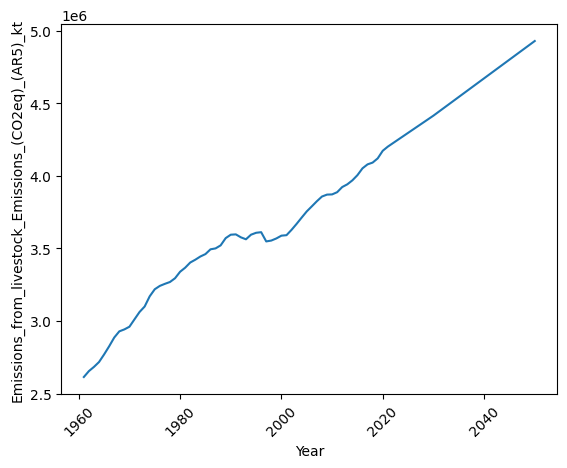

,Area Code,Area,Year,Total_Energy_Emissions_(CO2)_kt,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Emissions_(CO2)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Drained_organic_soils_Area_ha,Drained_organic_soils_Emissions_(CO2)_kt,...,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Total_Energy_Emissions_(CH4_CO2eq)_kt,Total_Energy_Emissions_(N2O_CO2eq)_kt,Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt,Drained_organic_soils_Emissions_(N2O_CO2eq)_kt,Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt
34628,5000,World,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.499322e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34629,5000,World,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.543130e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34630,5000,World,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.590271e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34631,5000,World,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.640279e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34632,5000,World,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.691979e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34774,5000,World,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.038852e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34775,5000,World,2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.037989e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34776,5000,World,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.037045e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34777,5000,World,2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.036027e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
query_country(df, "World", target_col='Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt')

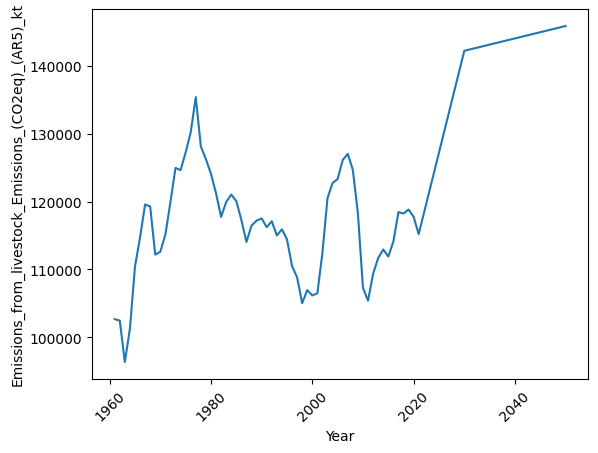

,Area Code,Area,Year,Total_Energy_Emissions_(CO2)_kt,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Emissions_(CO2)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Drained_organic_soils_Area_ha,Drained_organic_soils_Emissions_(CO2)_kt,...,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Total_Energy_Emissions_(CH4_CO2eq)_kt,Total_Energy_Emissions_(N2O_CO2eq)_kt,Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt,Drained_organic_soils_Emissions_(N2O_CO2eq)_kt,Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt
1168,9,Argentina,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17017.742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,9,Argentina,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17354.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,9,Argentina,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17693.853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,9,Argentina,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18032.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,9,Argentina,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18369.249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,9,Argentina,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,48344.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,9,Argentina,2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,48151.485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1316,9,Argentina,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47956.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,9,Argentina,2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47759.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
query_country(df, "Argentina", target_col='Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt')

### Add missing country year combinations

There is a lot of missing data.

**Will select 1980-2021 for real data and projections for 2022-2030**

Then backfill and forward fill the missing data.

In [10]:
# Assuming df is your original DataFrame
countries = df['Area'].unique()
years = range(1980, 2031)

# Create a cartesian product of all unique countries and years
cartesian_product = list(itertools.product(countries, years))

In [11]:
print(df.shape)
# Create a DataFrame from the cartesian product
complete_df = pd.DataFrame(cartesian_product, columns=['Area', 'Year'])

# Merge with the original DataFrame to fill in missing combinations with NaN
df = complete_df.merge(df, on=['Area', 'Year'], how='left')
print(df.shape)

(39911, 78)
(14688, 78)


<Axes: xlabel='Area', ylabel='Year'>

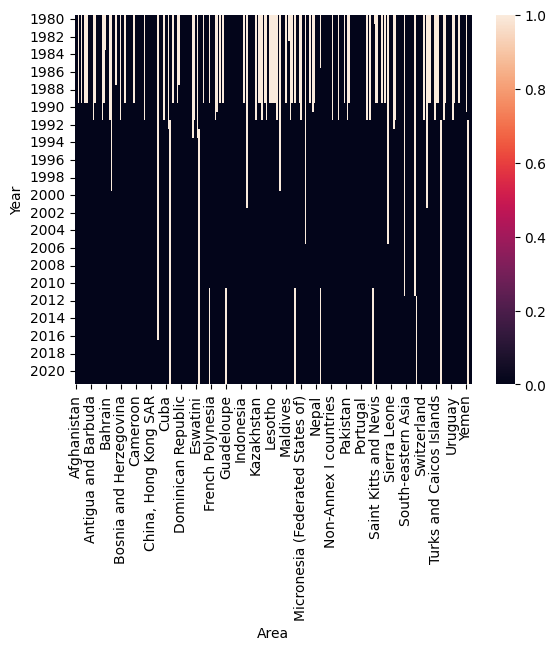

In [12]:
pivot_df = df.pivot_table(
    index = "Year", 
    columns="Area", 
    values="Total_Energy_Emissions_(CO2)_kt").isnull()

sns.heatmap(pivot_df)

In [13]:
real_df = df[(df.Year >= 1980) & (df.Year <= 2021)] #up to 2021 for emissions data
proj_df = df[(df.Year > 2021) & (df.Year <= 2030)] #projections for 2022-2030

## NaN imputation

In [14]:
real_df.isnull().sum()

Area                                                   0
Year                                                   0
Area Code                                            766
Total_Energy_Emissions_(CO2)_kt                     2264
Total_Energy_Energy_use_in_agriculture_TJ           2072
                                                    ... 
Total_Energy_Emissions_(CH4_CO2eq)_kt               2262
Total_Energy_Emissions_(N2O_CO2eq)_kt               2329
Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt     3519
Drained_organic_soils_Emissions_(N2O_CO2eq)_kt      3519
Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt    3519
Length: 78, dtype: int64

In [15]:
for col in real_df.columns:
    real_df[col] = real_df.groupby("Area", group_keys=False)[col].apply(
        lambda series: series.bfill().ffill())

## Cleaning and adding emissions

# save the processed data

In [16]:
projection_cols = ['Area Code', 'Area', 'Year', 'Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No']
proj_df = proj_df[projection_cols]

proj_df.to_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\population_projections.parquet', index=False)

In [17]:
real_df.to_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\full_country_dataset_v2_imputed.parquet', index=False)